SAMARTH MOTKA
202311023
LAB-8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import gensim
from gensim import corpora



In [ ]:

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AML/tripadvisor_hotel_reviews.csv")


In [ ]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()




In [ ]:
def preprocess_text(text):
    words = word_tokenize(text)                                             #Tokenization
    words = [word for word in words if word.lower() not in stop_words]      #Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]                  #Lemmatization
    return words



In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

df['cleaned_review'] = df['Review'].apply(preprocess_text)


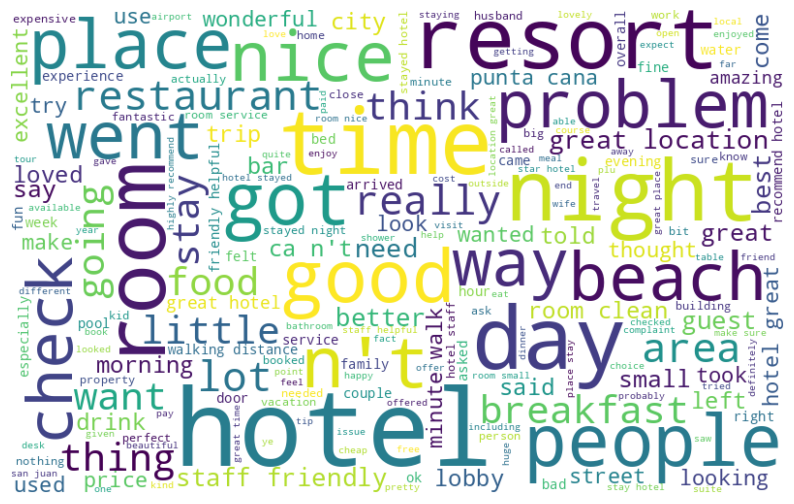

In [ ]:

# Word Cloud
all_words = ' '.join([word for sublist in df['cleaned_review'] for word in sublist])
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



In [ ]:
# dictionary and bag of words model
dictionary = corpora.Dictionary(df['cleaned_review'])
bow_corpus = [dictionary.doc2bow(doc) for doc in df['cleaned_review']]



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Example using CountVectorizer to create a document-term matrix
count_vect = CountVectorizer(stop_words='english')
doc_term_matrix = count_vect.fit_transform([' '.join(doc) for doc in df['cleaned_review']])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(doc_term_matrix)

# Display topics
feature_names = count_vect.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic 0:
hotel room stay service like bathroom area staff star pool
Topic 1:
hotel room great location good staff stay breakfast nice clean
Topic 2:
room hotel night stay staff day desk time bed service
Topic 3:
new york service staff sofitel westin hong kong best hotel
Topic 4:
beach resort room food pool day time great good restaurant
